<a href="https://colab.research.google.com/github/feniltailor22/Natural-Language-Processing/blob/main/Kaggle_Fake_News_Classifier_Using_Bidirectional_LSTM_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
#1. Install the Kaggle library
! pip install kaggle

In [3]:
#2. Make a directory named “.kaggle”
! mkdir ~/.kaggle

In [4]:
#3. Copy the “kaggle.json” into this new directory
! cp kaggle.json ~/.kaggle/

In [5]:
#4. Allocate the required permission for this file.
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
#Downloading Competitions dataset:
# Copy API Command 

! kaggle competitions download -c fake-news

  0% 0.00/40.6k [00:00<?, ?B/s]
100% 40.6k/40.6k [00:00<00:00, 15.5MB/s]
 89% 33.0M/37.0M [00:00<00:00, 72.3MB/s]
100% 37.0M/37.0M [00:00<00:00, 105MB/s] 
 85% 8.00M/9.42M [00:00<00:00, 82.6MB/s]
100% 9.42M/9.42M [00:00<00:00, 79.3MB/s]


In [7]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  train.csv.zip
  inflating: train.csv               

Archive:  test.csv.zip
  inflating: test.csv                

2 archives were successfully processed.


In [8]:
df= pd.read_csv('/content/train.csv')

In [9]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [11]:
df= df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 857.1+ KB


In [13]:
#Get the Independent Features

X=df.drop('label',axis=1)

In [14]:
## Get the Dependent features
y=df['label']

In [15]:
X.shape

(18285, 4)

In [16]:
y.shape

(18285,)

In [17]:
#checking labels if it is unbalance or not
df['label'].value_counts() 

0    10361
1     7924
Name: label, dtype: int64

In [18]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [19]:
#Vocabulary size
voc_size=5000

In [20]:
#Onehot Representation

In [21]:
messages= X.copy()

In [22]:
messages.reset_index(inplace=True) #reset_index is used to redo indexing as we dropped NaN values.

In [23]:
import nltk
import re
from nltk.corpus import stopwords

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
messages.title

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                        Why the Truth Might Get You Fired
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
18280    Rapper T.I.: Trump a ’Poster Child For White S...
18281    N.F.L. Playoffs: Schedule, Matchups and Odds -...
18282    Macy’s Is Said to Receive Takeover Approach by...
18283    NATO, Russia To Hold Parallel Exercises In Bal...
18284                            What Keeps the F-35 Alive
Name: title, Length: 18285, dtype: object

In [26]:
#Data Preprocessing

In [27]:
from nltk.stem.porter import PorterStemmer

In [28]:
ps= PorterStemmer()

In [29]:
corpus= []

for i in range(0, len(messages)):
  review= re.sub('[^a-zA-Z]', ' ', messages['title'][i]) #replacing the letters with blank (' ') except a-z and A-Z letters.  
  review= review.lower()
  review= review.split()

  review= [ps.stem(word) for word in review if not word in stopwords.words('english')] 
  review= ' '.join(review)
  corpus.append(review)

  #Stemmers remove morphological affixes from words, leaving only the word stem.
  #caresses= caress, traditional= tradit, reference= refer

In [30]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [31]:
onehot_repr=[one_hot(words,voc_size) for words in corpus] 
onehot_repr

[[4220, 1133, 489, 3805, 3307, 159, 1262, 1803, 2921, 3705],
 [4804, 307, 2354, 4774, 2101, 2111, 4460],
 [3661, 3645, 3520, 3230],
 [3021, 4253, 3040, 1637, 28, 3432],
 [2487, 2101, 338, 1217, 2801, 1978, 2101, 1731, 505, 961],
 [843,
  3729,
  2991,
  2090,
  3668,
  4071,
  1581,
  816,
  1551,
  2416,
  757,
  631,
  1612,
  1559,
  4460],
 [2545, 2932, 239, 1180, 1735, 3907, 1102, 3582, 1117, 3008, 3245],
 [1844, 2357, 4654, 2247, 5, 802, 4071, 224, 1117, 3008, 3245],
 [2803, 506, 2881, 28, 1166, 3575, 3598, 3155, 4071, 263],
 [3306, 35, 2253, 2264, 3897, 802, 1003, 59],
 [1486, 2170, 4090, 4167, 4365, 1378, 364, 4032, 3041, 1658, 1200],
 [1637, 1476, 3307, 3575, 4071, 5],
 [2098, 2682, 4753, 1658, 3083, 1846, 2505, 2198, 3179],
 [4524, 2409, 1970, 2099, 4923, 3134, 1319, 1117, 3008, 3245],
 [1454, 12, 2299, 1035, 3453, 1117, 3008, 3245],
 [3590, 2785, 3437, 3976, 3578, 2785, 4760, 609, 4358, 93],
 [643, 2676, 307],
 [796, 2346, 1706, 1484, 4071, 2546, 4209, 4460],
 [1029, 3081, 2

In [32]:
#Embedding Representation

In [33]:
sent_len= 20
embedded_docs= pad_sequences(sequences=onehot_repr, padding='pre', maxlen=sent_len)
print(embedded_docs)

[[   0    0    0 ... 1803 2921 3705]
 [   0    0    0 ... 2101 2111 4460]
 [   0    0    0 ... 3645 3520 3230]
 ...
 [   0    0    0 ... 1117 3008 3245]
 [   0    0    0 ... 4845 1564 3556]
 [   0    0    0 ... 3072 3769 4046]]


In [34]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 4220,
       1133,  489, 3805, 3307,  159, 1262, 1803, 2921, 3705], dtype=int32)

In [35]:
#creating a model
embedding_feature_vectors= 40
model= Sequential()
model.add(Embedding(input_dim=voc_size, output_dim=embedding_feature_vectors, input_length=sent_len))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='sigmoid')) #this is classification problem. Hence we are taking last layer as Dense layer.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________


In [36]:
#Now we will use generated embedded vectors as a input. 

X_final= np.array(embedded_docs)
y_final= np.array(y)

In [37]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [39]:
# Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 15s 57ms/step - loss: 0.3102 - accuracy: 0.8546 - val_loss: 0.2182 - val_accuracy: 0.9163
Epoch 2/10
192/192 [==============================] - 10s 51ms/step - loss: 0.1444 - accuracy: 0.9452 - val_loss: 0.1997 - val_accuracy: 0.9213
Epoch 3/10
192/192 [==============================] - 10s 51ms/step - loss: 0.0951 - accuracy: 0.9660 - val_loss: 0.2180 - val_accuracy: 0.9117
Epoch 4/10
192/192 [==============================] - 10s 50ms/step - loss: 0.0649 - accuracy: 0.9778 - val_loss: 0.2726 - val_accuracy: 0.9138
Epoch 5/10
192/192 [==============================] - 10s 52ms/step - loss: 0.0460 - accuracy: 0.9854 - val_loss: 0.3496 - val_accuracy: 0.9084
Epoch 6/10
192/192 [==============================] - 10s 52ms/step - loss: 0.0308 - accuracy: 0.9908 - val_loss: 0.3510 - val_accuracy: 0.9072
Epoch 7/10
192/192 [==============================] - 10s 51ms/step - loss: 0.0185 - accuracy: 0.9952 - val_loss: 0.4330 - val_accuracy:

In [40]:
losses= pd.DataFrame(data=model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.310204,0.854612,0.218164,0.916321
1,0.144396,0.945224,0.199669,0.921292
2,0.095127,0.966041,0.217998,0.911682
3,0.064905,0.977796,0.272595,0.913836
4,0.045961,0.985388,0.349602,0.908368
5,0.030813,0.990776,0.350974,0.907208
6,0.018523,0.995184,0.433010,0.908865
7,0.015934,0.995673,0.499508,0.906711
8,0.012684,0.996571,0.553149,0.903728
9,0.013381,0.996653,0.494364,0.907042


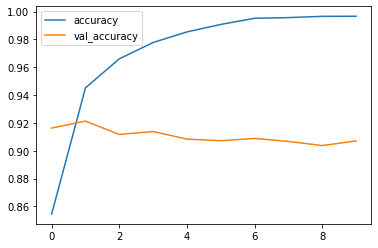

In [41]:
losses[['accuracy','val_accuracy']].plot()

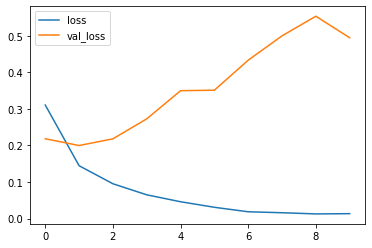

In [42]:
losses[['loss','val_loss']].plot()

In [43]:
#Performance Metrics And Accuracy

In [44]:
pred= model.predict(X_test)
pred

array([[9.9976951e-01],
       [1.8562376e-03],
       [1.9208193e-03],
       ...,
       [1.7061830e-04],
       [9.9867040e-01],
       [9.7066271e-01]], dtype=float32)

In [45]:
pred[0]

array([0.9997695], dtype=float32)

In [46]:
y_pred = np.where(pred > 0.5, 1, 0)

In [47]:
y_pred

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
print(confusion_matrix(y_test, y_pred))

[[3072  347]
 [ 214 2402]]


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      3419
           1       0.87      0.92      0.90      2616

    accuracy                           0.91      6035
   macro avg       0.90      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035



In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9070422535211268